In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from image_helpers import *
from classification import *
from cnn_model import CNN
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
#Global variables
image_dir = "../training/images/"
gt_dir = "../training/groundtruth/"
files = os.listdir(image_dir)

patch_size = 16
foregroud_threshold = 0.25

In [3]:
# Loading a set of images with their groundtruth
imgs, gt_imgs = load_n_images_groundtruth(image_dir, gt_dir, 100, rotate=True)

In [4]:
model = CNN(patch_size, foregroud_threshold)

In [14]:
model.train(imgs, gt_imgs)

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 197s 10ms/step - loss: 0.5539 - acc: 0.7375 - val_loss: 0.4602 - val_acc: 0.8208
Epoch 2/100
20000/20000 [==============================] - 195s 10ms/step - loss: 0.4674 - acc: 0.7466 - val_loss: 0.4162 - val_acc: 0.7864
Epoch 3/100
20000/20000 [==============================] - 196s 10ms/step - loss: 0.4004 - acc: 0.8034 - val_loss: 0.3665 - val_acc: 0.7890
Epoch 4/100
20000/20000 [==============================] - 233s 12ms/step - loss: 0.3393 - acc: 0.8468 - val_loss: 0.3853 - val_acc: 0.7844
Epoch 5/100
20000/20000 [==============================] - 219s 11ms/step - loss: 0.2995 - acc: 0.8680 - val_loss: 0.3571 - val_acc: 0.8298
Epoch 6/100
20000/20000 [==============================] - 205s 10ms/step - loss: 0.2604 - acc: 0.8893 - val_loss: 0.3895 - val_acc: 0.8050
Epoch 7/100
20000/20000 [==============================] - 216s 11ms/step - loss: 0.2340 - acc: 0.8991 - val_lo

In [ ]:
model.save_weights('training_weights.h5')

In [6]:
def predict_and_display_image(model, img, gt, real_img):
    '''Predict an image using the given model and display the result
    using pyplot'''
    Zi = model.predict(img)
    
    w = gt.shape[0]
    h = gt.shape[1]
    # Post processing
    Zi = Zi.reshape((int(h/model.patchSize), int(w/model.patchSize)))
    new_labels = post_processing(Zi).reshape(-1)
    # Generate groundtruth from label and concatenate it with the real image
    predicted_im = label_to_img(w, h, model.patchSize, model.patchSize, new_labels)
    cimg = concatenate_images(real_img, predicted_im)
    fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
    plt.imshow(cimg, cmap='Greys_r')

    new_img = make_img_overlay(real_img, predicted_im)

    plt.imshow(new_img)

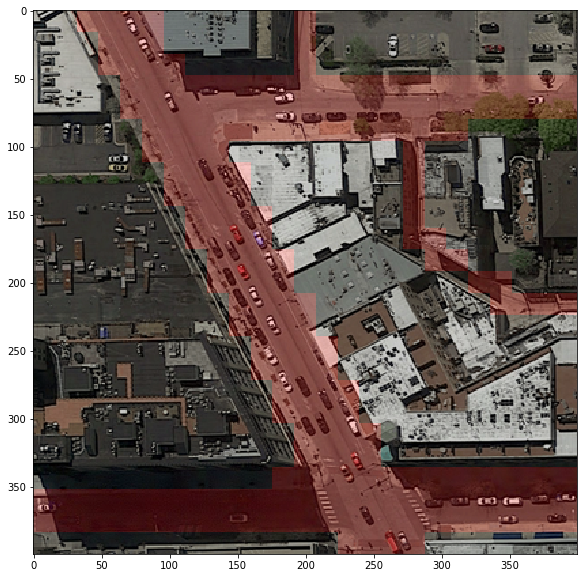

In [7]:
#Predict and Display image
img_idx = 330
predict_and_display_image(model, imgs[img_idx], gt_imgs[img_idx], imgs[img_idx])

In [30]:
from classification import predict_test_set_images
predict_test_set_images('training.csv', model, cnn=True)

Predicting test image number 1
Predicting test image number 2
Predicting test image number 3
Predicting test image number 4
Predicting test image number 5
Predicting test image number 6
Predicting test image number 7
Predicting test image number 8
Predicting test image number 9
Predicting test image number 10
Predicting test image number 11
Predicting test image number 12
Predicting test image number 13
Predicting test image number 14
Predicting test image number 15
Predicting test image number 16
Predicting test image number 17
Predicting test image number 18
Predicting test image number 19
Predicting test image number 20
Predicting test image number 21
Predicting test image number 22
Predicting test image number 23
Predicting test image number 24
Predicting test image number 25
Predicting test image number 26
Predicting test image number 27
Predicting test image number 28
Predicting test image number 29
Predicting test image number 30
Predicting test image number 31
Predicting test i